In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
%store -r df
df=df

In [3]:
# Aplicando dummies na variavel Type_, transformando os 3 tipos de peças em 3 colunas de variáveis binárias
type_dum = pd.get_dummies(df['type_'])

In [4]:
# Recriando o dataframe com as variaveis dummies, e excluindo as colunas udi (serve como indexação) e product_id (serve apenas como chave de identificação da peça produzida)
df_x = df[['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear']]
df_model = df_x.join(type_dum, how = 'outer')
df_model = df_model.join(df[['target']], how = 'outer')
df_model

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,H,L,M,target
0,298.1,308.6,1551.0,42.8,0,False,False,True,False
1,298.2,308.7,1408.0,46.3,3,False,True,False,False
2,298.1,308.5,1498.0,49.4,5,False,True,False,False
3,298.2,308.6,1433.0,39.5,7,False,True,False,False
4,298.2,308.7,1408.0,40.0,9,False,True,False,False
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14,False,False,True,False
9996,298.9,308.4,1632.0,31.8,17,True,False,False,False
9997,299.0,308.6,1645.0,33.4,22,False,False,True,False
9998,299.0,308.7,1408.0,48.5,25,True,False,False,False


In [5]:
X = df[['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear']]
Y = df['target']

In [6]:
cf = DecisionTreeClassifier(max_depth=86, min_samples_leaf=68)
cf = cf.fit(X, Y)

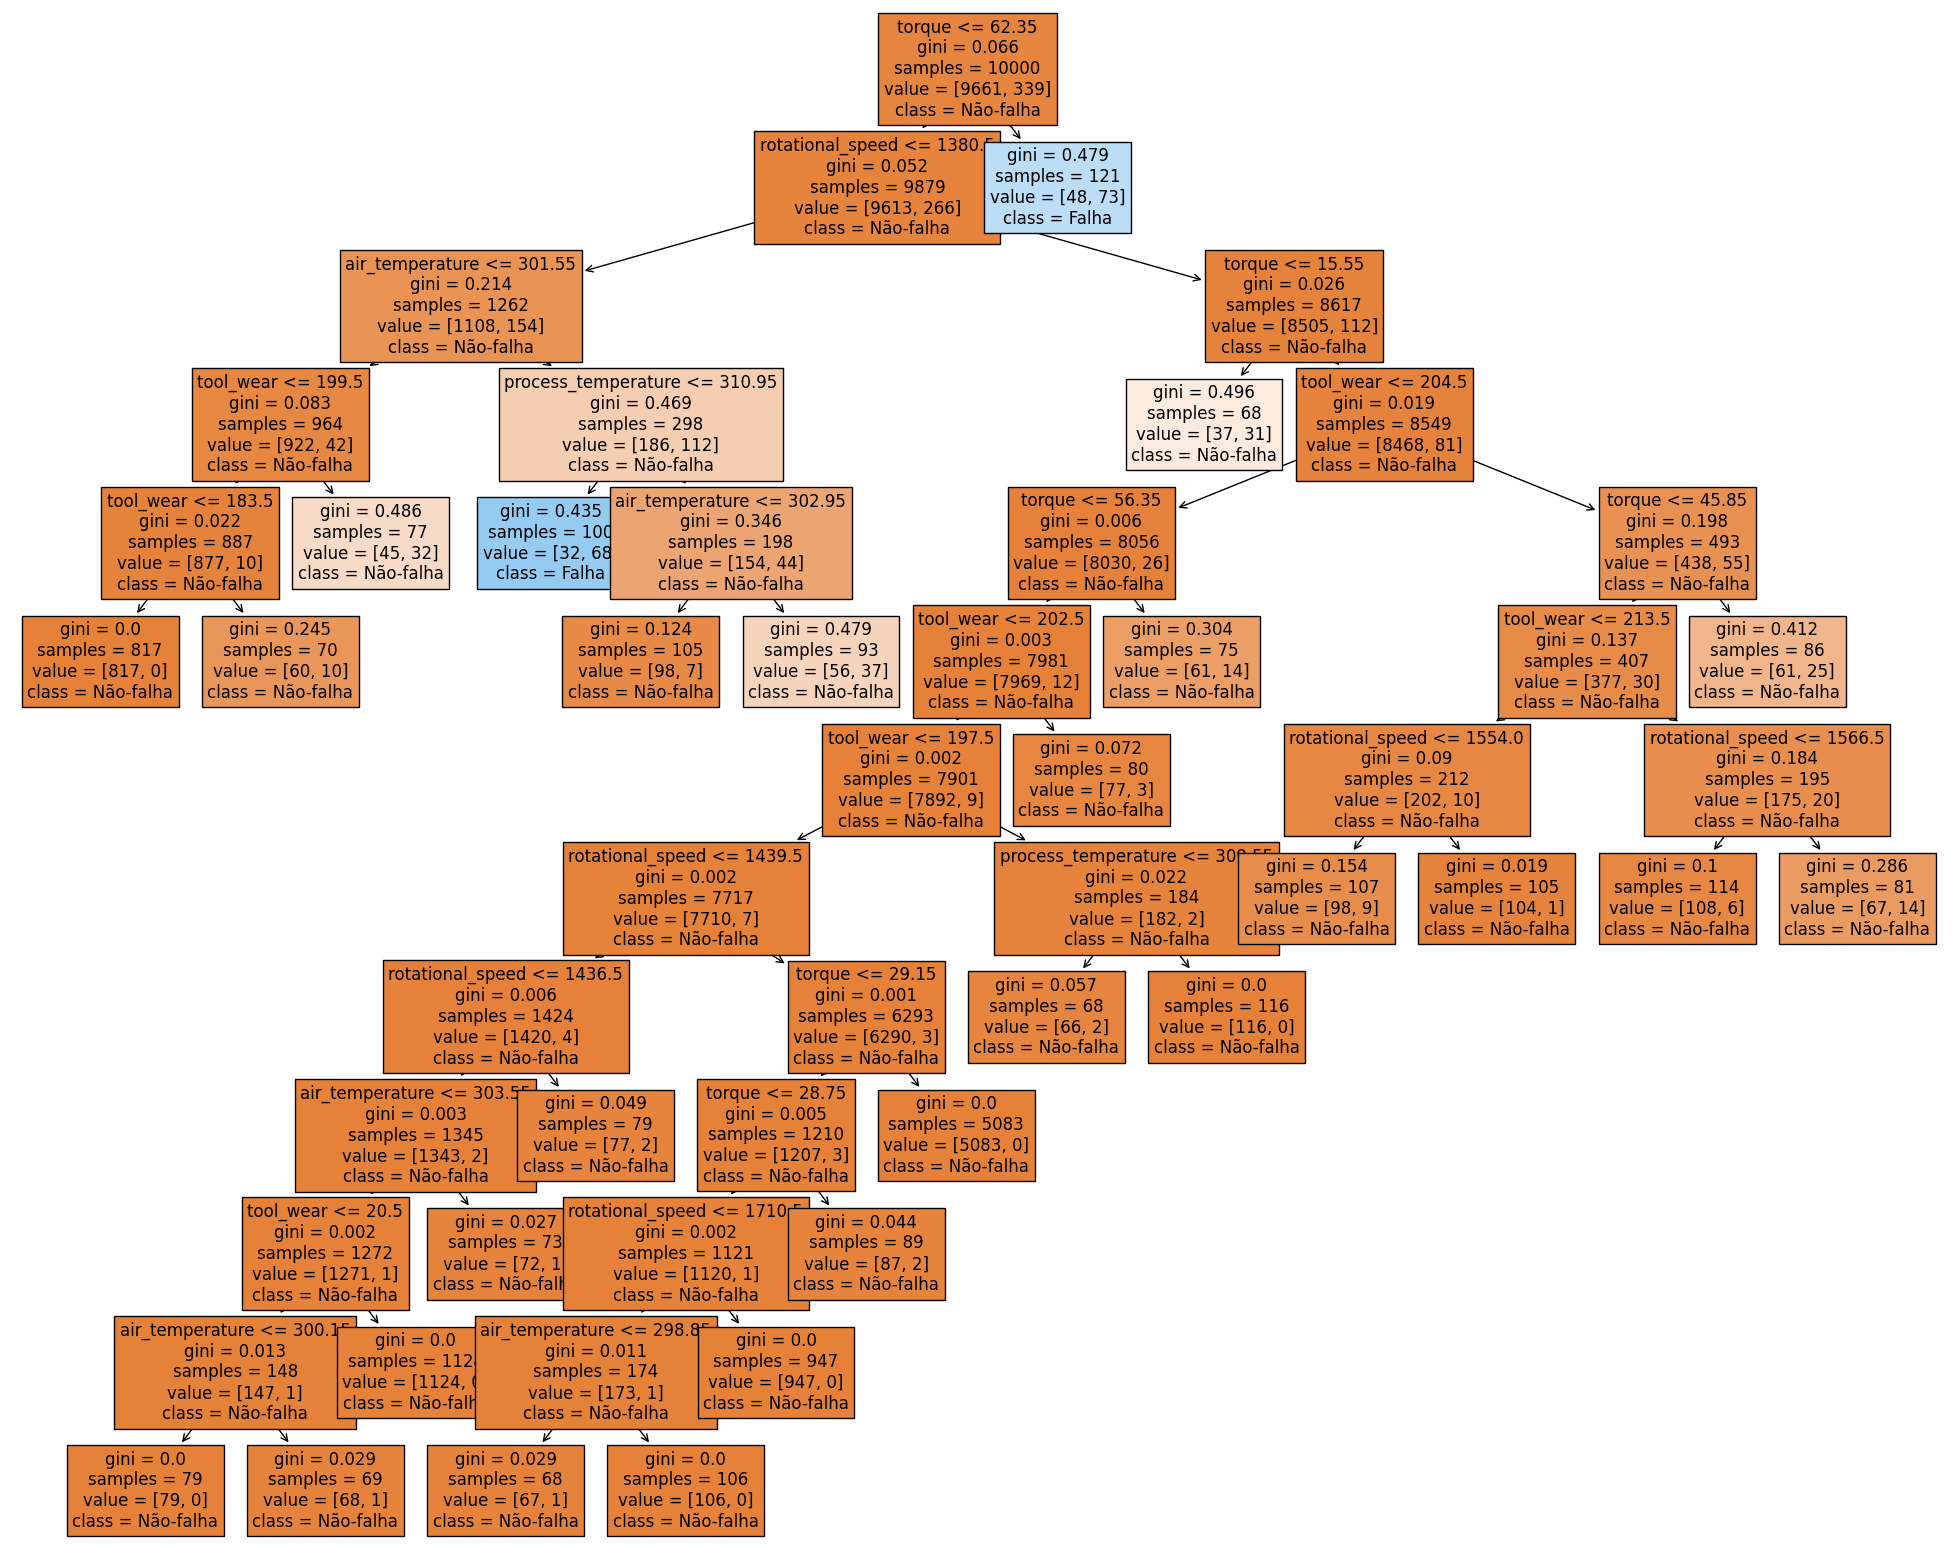

In [7]:
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(cf, feature_names=list(X.columns), class_names=['Não-falha', 'Falha'], filled=True, fontsize=12)


In [8]:
%store df_model

Stored 'df_model' (DataFrame)


A imagem acima ilustra como o modelo de classificação classificou as entradas númericas em "ranges" de valores, tornando-os classes. A primeira coisa a ser notada é que das 5 variaveis de entrada fornecidas, ele utilizou apenas 4 (ignorando a air_temperature). (VERIFICAR SE HOUVE ALGO NA CONFIGURAÇÃO DO CLASSIFICADOR, OU SE ELE REALMENTE NÃO ACHOU DE VALOR AGREGAR ESSA VARIÁVEL).

Nota-se que ele criou as seguintes classes:
- torque <=13 (Não-Falha);
- Process_temperature <=313.3 (Falha);
- Rotational Speed <=1380.5 (Não-Falha);
- Rotational Speed <=1228.5; (Falha)
- tool_wear <=141.5; (Não-Falha)
- torque <=67.4. (Falha)